## Load required packages

In [1]:
import h5py
import numpy as np
import scanpy as sc
import torch
import random

from scace import run_scace

## Set seed

In [2]:
seed = 666
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

## Read data

In [3]:
# This data could be downloaded from https://drive.google.com/drive/folders/1c33An3HNdJQhazoy_ky9E-lCc3a4y7fl

data_mat = h5py.File('Sim.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

adata = sc.AnnData(x)
adata.obs['celltype'] = y

/tmp/ipykernel_6091/3057746641.py:7: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(x)


## Perform data pre-processing

In [4]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
adata.raw = adata.copy()

sc.pp.normalize_per_cell(adata)
adata.obs['scale_factor'] = adata.obs.n_counts / adata.obs.n_counts.mean()

sc.pp.log1p(adata)
sc.pp.scale(adata)

In [5]:
adata

AnnData object with n_obs × n_vars = 1150 × 12305
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [8]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(adata, cl_type='celltype', return_all=True)

Start pre-training! Total epochs is 200.


Pre-training::   0%|▍                                                                                        | 1/200 [00:00<01:50,  1.80epoch/s]

Pre-training epoch [1/200]. Average ZINB loss:0.5733, kld loss:8.0231, total loss:0.5813


Pre-training::   1%|▉                                                                                        | 2/200 [00:00<01:11,  2.78epoch/s]

Pre-training epoch [2/200]. Average ZINB loss:0.5179, kld loss:6.6668, total loss:0.5246


Pre-training::   2%|█▎                                                                                       | 3/200 [00:00<00:57,  3.41epoch/s]

Pre-training epoch [3/200]. Average ZINB loss:0.4736, kld loss:7.4299, total loss:0.4810


Pre-training::   2%|█▊                                                                                       | 4/200 [00:01<01:13,  2.65epoch/s]

Pre-training epoch [4/200]. Average ZINB loss:0.4355, kld loss:9.7420, total loss:0.4452


Pre-training::   2%|██▏                                                                                      | 5/200 [00:01<01:14,  2.61epoch/s]

Pre-training epoch [5/200]. Average ZINB loss:0.4035, kld loss:13.3643, total loss:0.4169


Pre-training::   4%|███                                                                                      | 7/200 [00:02<00:52,  3.66epoch/s]

Pre-training epoch [6/200]. Average ZINB loss:0.3833, kld loss:15.9713, total loss:0.3992
Pre-training epoch [7/200]. Average ZINB loss:0.3699, kld loss:15.8208, total loss:0.3857


Pre-training::   4%|███▌                                                                                     | 8/200 [00:02<00:46,  4.10epoch/s]

Pre-training epoch [8/200]. Average ZINB loss:0.3625, kld loss:13.6596, total loss:0.3761


Pre-training::   4%|████                                                                                     | 9/200 [00:02<00:46,  4.14epoch/s]

Pre-training epoch [9/200]. Average ZINB loss:0.3565, kld loss:12.0930, total loss:0.3686


Pre-training::   5%|████▍                                                                                   | 10/200 [00:02<00:46,  4.07epoch/s]

Pre-training epoch [10/200]. Average ZINB loss:0.3520, kld loss:11.4435, total loss:0.3635


Pre-training::   6%|████▊                                                                                   | 11/200 [00:03<00:51,  3.66epoch/s]

Pre-training epoch [11/200]. Average ZINB loss:0.3467, kld loss:11.5786, total loss:0.3583


Pre-training::   6%|█████▎                                                                                  | 12/200 [00:03<00:57,  3.28epoch/s]

Pre-training epoch [12/200]. Average ZINB loss:0.3430, kld loss:11.8685, total loss:0.3549


Pre-training::   6%|█████▋                                                                                  | 13/200 [00:04<01:10,  2.66epoch/s]

Pre-training epoch [13/200]. Average ZINB loss:0.3401, kld loss:11.8069, total loss:0.3519


Pre-training::   8%|██████▌                                                                                 | 15/200 [00:04<00:53,  3.48epoch/s]

Pre-training epoch [14/200]. Average ZINB loss:0.3380, kld loss:11.4198, total loss:0.3494
Pre-training epoch [15/200]. Average ZINB loss:0.3352, kld loss:11.1584, total loss:0.3464


Pre-training::   8%|███████▍                                                                                | 17/200 [00:04<00:41,  4.41epoch/s]

Pre-training epoch [16/200]. Average ZINB loss:0.3336, kld loss:10.9405, total loss:0.3445
Pre-training epoch [17/200]. Average ZINB loss:0.3315, kld loss:10.9457, total loss:0.3425


Pre-training::  10%|████████▎                                                                               | 19/200 [00:05<00:38,  4.68epoch/s]

Pre-training epoch [18/200]. Average ZINB loss:0.3297, kld loss:10.9750, total loss:0.3406
Pre-training epoch [19/200]. Average ZINB loss:0.3284, kld loss:10.5979, total loss:0.3390


Pre-training::  10%|████████▊                                                                               | 20/200 [00:05<00:44,  4.04epoch/s]

Pre-training epoch [20/200]. Average ZINB loss:0.3277, kld loss:10.1819, total loss:0.3378


Pre-training::  10%|█████████▏                                                                              | 21/200 [00:05<00:46,  3.81epoch/s]

Pre-training epoch [21/200]. Average ZINB loss:0.3261, kld loss:10.2093, total loss:0.3363


Pre-training::  12%|██████████                                                                              | 23/200 [00:06<00:40,  4.33epoch/s]

Pre-training epoch [22/200]. Average ZINB loss:0.3259, kld loss:10.1210, total loss:0.3360
Pre-training epoch [23/200]. Average ZINB loss:0.3242, kld loss:9.9041, total loss:0.3341


Pre-training::  12%|██████████▌                                                                             | 24/200 [00:06<00:43,  4.02epoch/s]

Pre-training epoch [24/200]. Average ZINB loss:0.3241, kld loss:9.6301, total loss:0.3337


Pre-training::  12%|███████████                                                                             | 25/200 [00:06<00:43,  4.02epoch/s]

Pre-training epoch [25/200]. Average ZINB loss:0.3232, kld loss:9.6549, total loss:0.3328


Pre-training::  14%|███████████▉                                                                            | 27/200 [00:07<00:34,  4.96epoch/s]

Pre-training epoch [26/200]. Average ZINB loss:0.3231, kld loss:9.6683, total loss:0.3328
Pre-training epoch [27/200]. Average ZINB loss:0.3211, kld loss:9.3786, total loss:0.3305


Pre-training::  14%|████████████▊                                                                           | 29/200 [00:07<00:28,  6.04epoch/s]

Pre-training epoch [28/200]. Average ZINB loss:0.3212, kld loss:9.1402, total loss:0.3303
Pre-training epoch [29/200]. Average ZINB loss:0.3203, kld loss:8.9409, total loss:0.3292


Pre-training::  15%|█████████████▏                                                                          | 30/200 [00:07<00:29,  5.70epoch/s]

Pre-training epoch [30/200]. Average ZINB loss:0.3203, kld loss:8.9904, total loss:0.3292


Pre-training::  16%|█████████████▋                                                                          | 31/200 [00:07<00:32,  5.24epoch/s]

Pre-training epoch [31/200]. Average ZINB loss:0.3196, kld loss:8.9882, total loss:0.3286


Pre-training::  16%|██████████████                                                                          | 32/200 [00:08<00:36,  4.63epoch/s]

Pre-training epoch [32/200]. Average ZINB loss:0.3194, kld loss:8.8761, total loss:0.3283


Pre-training::  17%|██████████████▉                                                                         | 34/200 [00:08<00:38,  4.32epoch/s]

Pre-training epoch [33/200]. Average ZINB loss:0.3190, kld loss:8.6779, total loss:0.3277
Pre-training epoch [34/200]. Average ZINB loss:0.3180, kld loss:8.7563, total loss:0.3268


Pre-training::  18%|███████████████▍                                                                        | 35/200 [00:08<00:32,  5.01epoch/s]

Pre-training epoch [35/200]. Average ZINB loss:0.3181, kld loss:8.8074, total loss:0.3270


Pre-training::  18%|███████████████▊                                                                        | 36/200 [00:09<00:34,  4.71epoch/s]

Pre-training epoch [36/200]. Average ZINB loss:0.3171, kld loss:8.5001, total loss:0.3256


Pre-training::  19%|████████████████▋                                                                       | 38/200 [00:09<00:38,  4.24epoch/s]

Pre-training epoch [37/200]. Average ZINB loss:0.3170, kld loss:8.2714, total loss:0.3253
Pre-training epoch [38/200]. Average ZINB loss:0.3159, kld loss:8.3449, total loss:0.3242


Pre-training::  20%|█████████████████▏                                                                      | 39/200 [00:09<00:33,  4.77epoch/s]

Pre-training epoch [39/200]. Average ZINB loss:0.3161, kld loss:8.5014, total loss:0.3246


Pre-training::  20%|█████████████████▌                                                                      | 40/200 [00:10<00:43,  3.71epoch/s]

Pre-training epoch [40/200]. Average ZINB loss:0.3156, kld loss:8.3012, total loss:0.3239


Pre-training::  20%|██████████████████                                                                      | 41/200 [00:10<00:53,  2.97epoch/s]

Pre-training epoch [41/200]. Average ZINB loss:0.3153, kld loss:8.1473, total loss:0.3235


Pre-training::  21%|██████████████████▍                                                                     | 42/200 [00:11<00:55,  2.85epoch/s]

Pre-training epoch [42/200]. Average ZINB loss:0.3154, kld loss:8.0555, total loss:0.3235


Pre-training::  22%|██████████████████▉                                                                     | 43/200 [00:11<00:56,  2.80epoch/s]

Pre-training epoch [43/200]. Average ZINB loss:0.3148, kld loss:8.0734, total loss:0.3229


Pre-training::  22%|███████████████████▎                                                                    | 44/200 [00:11<00:52,  2.97epoch/s]

Pre-training epoch [44/200]. Average ZINB loss:0.3142, kld loss:8.1997, total loss:0.3224


Pre-training::  22%|███████████████████▊                                                                    | 45/200 [00:12<00:49,  3.13epoch/s]

Pre-training epoch [45/200]. Average ZINB loss:0.3147, kld loss:8.2163, total loss:0.3229


Pre-training::  23%|████████████████████▏                                                                   | 46/200 [00:12<00:50,  3.07epoch/s]

Pre-training epoch [46/200]. Average ZINB loss:0.3140, kld loss:8.1265, total loss:0.3221


Pre-training::  24%|████████████████████▋                                                                   | 47/200 [00:12<00:44,  3.42epoch/s]

Pre-training epoch [47/200]. Average ZINB loss:0.3129, kld loss:8.0021, total loss:0.3209


Pre-training::  24%|█████████████████████                                                                   | 48/200 [00:12<00:46,  3.28epoch/s]

Pre-training epoch [48/200]. Average ZINB loss:0.3133, kld loss:8.1598, total loss:0.3215


Pre-training::  24%|█████████████████████▌                                                                  | 49/200 [00:13<00:42,  3.54epoch/s]

Pre-training epoch [49/200]. Average ZINB loss:0.3132, kld loss:7.9934, total loss:0.3212


Pre-training::  26%|██████████████████████▍                                                                 | 51/200 [00:13<00:35,  4.14epoch/s]

Pre-training epoch [50/200]. Average ZINB loss:0.3125, kld loss:7.7893, total loss:0.3203
Pre-training epoch [51/200]. Average ZINB loss:0.3127, kld loss:7.7838, total loss:0.3205


Pre-training::  26%|███████████████████████▎                                                                | 53/200 [00:14<00:35,  4.10epoch/s]

Pre-training epoch [52/200]. Average ZINB loss:0.3111, kld loss:7.8781, total loss:0.3189
Pre-training epoch [53/200]. Average ZINB loss:0.3117, kld loss:7.9281, total loss:0.3196


Pre-training::  27%|███████████████████████▊                                                                | 54/200 [00:14<00:32,  4.46epoch/s]

Pre-training epoch [54/200]. Average ZINB loss:0.3112, kld loss:7.7601, total loss:0.3190


Pre-training::  28%|████████████████████████▏                                                               | 55/200 [00:14<00:42,  3.39epoch/s]

Pre-training epoch [55/200]. Average ZINB loss:0.3112, kld loss:7.8591, total loss:0.3190


Pre-training::  28%|████████████████████████▋                                                               | 56/200 [00:15<00:41,  3.45epoch/s]

Pre-training epoch [56/200]. Average ZINB loss:0.3113, kld loss:7.7037, total loss:0.3191


Pre-training::  28%|█████████████████████████                                                               | 57/200 [00:15<00:41,  3.44epoch/s]

Pre-training epoch [57/200]. Average ZINB loss:0.3108, kld loss:7.6866, total loss:0.3184


Pre-training::  29%|█████████████████████████▌                                                              | 58/200 [00:15<00:40,  3.48epoch/s]

Pre-training epoch [58/200]. Average ZINB loss:0.3101, kld loss:7.7175, total loss:0.3178


Pre-training::  30%|█████████████████████████▉                                                              | 59/200 [00:15<00:41,  3.40epoch/s]

Pre-training epoch [59/200]. Average ZINB loss:0.3111, kld loss:7.6146, total loss:0.3188


Pre-training::  30%|██████████████████████████▍                                                             | 60/200 [00:16<00:43,  3.18epoch/s]

Pre-training epoch [60/200]. Average ZINB loss:0.3100, kld loss:7.5473, total loss:0.3175


Pre-training::  30%|██████████████████████████▊                                                             | 61/200 [00:16<00:43,  3.23epoch/s]

Pre-training epoch [61/200]. Average ZINB loss:0.3098, kld loss:7.6651, total loss:0.3175


Pre-training::  31%|███████████████████████████▎                                                            | 62/200 [00:16<00:41,  3.31epoch/s]

Pre-training epoch [62/200]. Average ZINB loss:0.3098, kld loss:7.4353, total loss:0.3173


Pre-training::  32%|████████████████████████████▏                                                           | 64/200 [00:17<00:35,  3.83epoch/s]

Pre-training epoch [63/200]. Average ZINB loss:0.3102, kld loss:7.4651, total loss:0.3176
Pre-training epoch [64/200]. Average ZINB loss:0.3087, kld loss:7.7333, total loss:0.3164


Pre-training::  32%|████████████████████████████▌                                                           | 65/200 [00:17<00:34,  3.88epoch/s]

Pre-training epoch [65/200]. Average ZINB loss:0.3094, kld loss:7.6760, total loss:0.3170


Pre-training::  33%|█████████████████████████████                                                           | 66/200 [00:17<00:41,  3.20epoch/s]

Pre-training epoch [66/200]. Average ZINB loss:0.3090, kld loss:7.5263, total loss:0.3165


Pre-training::  34%|█████████████████████████████▍                                                          | 67/200 [00:18<00:51,  2.57epoch/s]

Pre-training epoch [67/200]. Average ZINB loss:0.3088, kld loss:7.6126, total loss:0.3164


Pre-training::  34%|█████████████████████████████▉                                                          | 68/200 [00:19<00:55,  2.37epoch/s]

Pre-training epoch [68/200]. Average ZINB loss:0.3082, kld loss:7.6131, total loss:0.3158


Pre-training::  34%|██████████████████████████████▎                                                         | 69/200 [00:19<00:54,  2.41epoch/s]

Pre-training epoch [69/200]. Average ZINB loss:0.3089, kld loss:7.4583, total loss:0.3163


Pre-training::  35%|██████████████████████████████▊                                                         | 70/200 [00:19<00:49,  2.62epoch/s]

Pre-training epoch [70/200]. Average ZINB loss:0.3083, kld loss:7.4006, total loss:0.3157


Pre-training::  36%|███████████████████████████████▏                                                        | 71/200 [00:19<00:42,  3.01epoch/s]

Pre-training epoch [71/200]. Average ZINB loss:0.3076, kld loss:7.4499, total loss:0.3150


Pre-training::  36%|███████████████████████████████▋                                                        | 72/200 [00:20<00:38,  3.33epoch/s]

Pre-training epoch [72/200]. Average ZINB loss:0.3084, kld loss:7.2288, total loss:0.3156


Pre-training::  36%|████████████████████████████████                                                        | 73/200 [00:20<00:36,  3.52epoch/s]

Pre-training epoch [73/200]. Average ZINB loss:0.3078, kld loss:7.3489, total loss:0.3151


Pre-training::  37%|████████████████████████████████▌                                                       | 74/200 [00:20<00:38,  3.28epoch/s]

Pre-training epoch [74/200]. Average ZINB loss:0.3086, kld loss:7.4587, total loss:0.3161


Pre-training::  38%|█████████████████████████████████                                                       | 75/200 [00:21<00:34,  3.64epoch/s]

Pre-training epoch [75/200]. Average ZINB loss:0.3082, kld loss:7.3227, total loss:0.3156


Pre-training::  38%|█████████████████████████████████▍                                                      | 76/200 [00:21<00:32,  3.80epoch/s]

Pre-training epoch [76/200]. Average ZINB loss:0.3078, kld loss:7.3750, total loss:0.3151


Pre-training::  38%|█████████████████████████████████▉                                                      | 77/200 [00:21<00:32,  3.79epoch/s]

Pre-training epoch [77/200]. Average ZINB loss:0.3077, kld loss:7.4437, total loss:0.3152


Pre-training::  39%|██████████████████████████████████▎                                                     | 78/200 [00:21<00:36,  3.31epoch/s]

Pre-training epoch [78/200]. Average ZINB loss:0.3074, kld loss:7.3359, total loss:0.3147


Pre-training::  40%|██████████████████████████████████▊                                                     | 79/200 [00:22<00:37,  3.27epoch/s]

Pre-training epoch [79/200]. Average ZINB loss:0.3071, kld loss:7.2991, total loss:0.3144


Pre-training::  40%|███████████████████████████████████▏                                                    | 80/200 [00:22<00:34,  3.43epoch/s]

Pre-training epoch [80/200]. Average ZINB loss:0.3074, kld loss:7.2772, total loss:0.3147


Pre-training::  40%|███████████████████████████████████▋                                                    | 81/200 [00:22<00:33,  3.54epoch/s]

Pre-training epoch [81/200]. Average ZINB loss:0.3064, kld loss:7.2751, total loss:0.3136


Pre-training::  41%|████████████████████████████████████                                                    | 82/200 [00:23<00:36,  3.27epoch/s]

Pre-training epoch [82/200]. Average ZINB loss:0.3071, kld loss:7.4067, total loss:0.3145


Pre-training::  42%|████████████████████████████████████▌                                                   | 83/200 [00:23<00:37,  3.09epoch/s]

Pre-training epoch [83/200]. Average ZINB loss:0.3060, kld loss:7.2808, total loss:0.3133


Pre-training::  42%|████████████████████████████████████▉                                                   | 84/200 [00:23<00:44,  2.61epoch/s]

Pre-training epoch [84/200]. Average ZINB loss:0.3067, kld loss:7.2001, total loss:0.3139


Pre-training::  42%|█████████████████████████████████████▍                                                  | 85/200 [00:24<00:44,  2.61epoch/s]

Pre-training epoch [85/200]. Average ZINB loss:0.3067, kld loss:7.2974, total loss:0.3140


Pre-training::  43%|█████████████████████████████████████▊                                                  | 86/200 [00:24<00:39,  2.92epoch/s]

Pre-training epoch [86/200]. Average ZINB loss:0.3067, kld loss:7.3728, total loss:0.3140


Pre-training::  44%|██████████████████████████████████████▎                                                 | 87/200 [00:24<00:38,  2.94epoch/s]

Pre-training epoch [87/200]. Average ZINB loss:0.3056, kld loss:7.3094, total loss:0.3129


Pre-training::  44%|██████████████████████████████████████▋                                                 | 88/200 [00:25<00:42,  2.65epoch/s]

Pre-training epoch [88/200]. Average ZINB loss:0.3060, kld loss:7.2036, total loss:0.3132


Pre-training::  44%|███████████████████████████████████████▏                                                | 89/200 [00:25<00:37,  2.94epoch/s]

Pre-training epoch [89/200]. Average ZINB loss:0.3065, kld loss:7.1997, total loss:0.3137


Pre-training::  45%|███████████████████████████████████████▌                                                | 90/200 [00:25<00:33,  3.29epoch/s]

Pre-training epoch [90/200]. Average ZINB loss:0.3065, kld loss:7.0995, total loss:0.3136


Pre-training::  46%|████████████████████████████████████████                                                | 91/200 [00:26<00:30,  3.54epoch/s]

Pre-training epoch [91/200]. Average ZINB loss:0.3059, kld loss:7.0834, total loss:0.3130


Pre-training::  46%|████████████████████████████████████████▍                                               | 92/200 [00:26<00:29,  3.64epoch/s]

Pre-training epoch [92/200]. Average ZINB loss:0.3061, kld loss:7.1903, total loss:0.3133


Pre-training::  46%|████████████████████████████████████████▉                                               | 93/200 [00:26<00:29,  3.58epoch/s]

Pre-training epoch [93/200]. Average ZINB loss:0.3052, kld loss:7.2068, total loss:0.3124


Pre-training::  47%|█████████████████████████████████████████▎                                              | 94/200 [00:26<00:30,  3.46epoch/s]

Pre-training epoch [94/200]. Average ZINB loss:0.3057, kld loss:7.2523, total loss:0.3129


Pre-training::  48%|█████████████████████████████████████████▊                                              | 95/200 [00:27<00:29,  3.51epoch/s]

Pre-training epoch [95/200]. Average ZINB loss:0.3056, kld loss:7.2695, total loss:0.3129


Pre-training::  48%|██████████████████████████████████████████▋                                             | 97/200 [00:27<00:24,  4.13epoch/s]

Pre-training epoch [96/200]. Average ZINB loss:0.3051, kld loss:7.1360, total loss:0.3122
Pre-training epoch [97/200]. Average ZINB loss:0.3055, kld loss:7.0773, total loss:0.3126


Pre-training::  49%|███████████████████████████████████████████                                             | 98/200 [00:27<00:21,  4.72epoch/s]

Pre-training epoch [98/200]. Average ZINB loss:0.3053, kld loss:7.0841, total loss:0.3124


Pre-training::  50%|███████████████████████████████████████████▌                                            | 99/200 [00:28<00:25,  3.91epoch/s]

Pre-training epoch [99/200]. Average ZINB loss:0.3051, kld loss:7.0499, total loss:0.3121


Pre-training::  50%|███████████████████████████████████████████▌                                           | 100/200 [00:28<00:28,  3.48epoch/s]

Pre-training epoch [100/200]. Average ZINB loss:0.3049, kld loss:7.1331, total loss:0.3120


Pre-training::  50%|███████████████████████████████████████████▉                                           | 101/200 [00:28<00:29,  3.31epoch/s]

Pre-training epoch [101/200]. Average ZINB loss:0.3044, kld loss:7.1727, total loss:0.3116


Pre-training::  51%|████████████████████████████████████████████▎                                          | 102/200 [00:29<00:28,  3.47epoch/s]

Pre-training epoch [102/200]. Average ZINB loss:0.3052, kld loss:7.0946, total loss:0.3123


Pre-training::  52%|████████████████████████████████████████████▊                                          | 103/200 [00:29<00:27,  3.57epoch/s]

Pre-training epoch [103/200]. Average ZINB loss:0.3046, kld loss:7.0423, total loss:0.3117


Pre-training::  52%|█████████████████████████████████████████████▋                                         | 105/200 [00:29<00:23,  4.04epoch/s]

Pre-training epoch [104/200]. Average ZINB loss:0.3045, kld loss:7.0261, total loss:0.3116
Pre-training epoch [105/200]. Average ZINB loss:0.3047, kld loss:7.0295, total loss:0.3117


Pre-training::  54%|██████████████████████████████████████████████▌                                        | 107/200 [00:30<00:17,  5.24epoch/s]

Pre-training epoch [106/200]. Average ZINB loss:0.3044, kld loss:7.0616, total loss:0.3115
Pre-training epoch [107/200]. Average ZINB loss:0.3040, kld loss:6.9029, total loss:0.3109


Pre-training::  54%|██████████████████████████████████████████████▉                                        | 108/200 [00:30<00:18,  4.97epoch/s]

Pre-training epoch [108/200]. Average ZINB loss:0.3049, kld loss:7.0505, total loss:0.3120


Pre-training::  55%|███████████████████████████████████████████████▊                                       | 110/200 [00:30<00:19,  4.59epoch/s]

Pre-training epoch [109/200]. Average ZINB loss:0.3042, kld loss:7.2348, total loss:0.3114
Pre-training epoch [110/200]. Average ZINB loss:0.3038, kld loss:7.2367, total loss:0.3110


Pre-training::  56%|████████████████████████████████████████████████▋                                      | 112/200 [00:31<00:17,  5.01epoch/s]

Pre-training epoch [111/200]. Average ZINB loss:0.3048, kld loss:7.1424, total loss:0.3120
Pre-training epoch [112/200]. Average ZINB loss:0.3036, kld loss:7.0299, total loss:0.3106


Pre-training::  56%|█████████████████████████████████████████████████▏                                     | 113/200 [00:31<00:16,  5.40epoch/s]

Pre-training epoch [113/200]. Average ZINB loss:0.3039, kld loss:7.0435, total loss:0.3109


Pre-training::  57%|█████████████████████████████████████████████████▌                                     | 114/200 [00:31<00:20,  4.24epoch/s]

Pre-training epoch [114/200]. Average ZINB loss:0.3034, kld loss:7.0299, total loss:0.3104


Pre-training::  58%|██████████████████████████████████████████████████▍                                    | 116/200 [00:32<00:18,  4.58epoch/s]

Pre-training epoch [115/200]. Average ZINB loss:0.3040, kld loss:7.0521, total loss:0.3110
Pre-training epoch [116/200]. Average ZINB loss:0.3037, kld loss:7.0699, total loss:0.3107


Pre-training::  58%|██████████████████████████████████████████████████▉                                    | 117/200 [00:32<00:16,  5.01epoch/s]

Pre-training epoch [117/200]. Average ZINB loss:0.3040, kld loss:7.0776, total loss:0.3110


Pre-training::  59%|███████████████████████████████████████████████████▎                                   | 118/200 [00:32<00:16,  4.86epoch/s]

Pre-training epoch [118/200]. Average ZINB loss:0.3039, kld loss:7.1999, total loss:0.3111


Pre-training::  60%|███████████████████████████████████████████████████▊                                   | 119/200 [00:32<00:19,  4.06epoch/s]

Pre-training epoch [119/200]. Average ZINB loss:0.3034, kld loss:7.0363, total loss:0.3104


Pre-training::  60%|████████████████████████████████████████████████████▋                                  | 121/200 [00:33<00:19,  3.95epoch/s]

Pre-training epoch [120/200]. Average ZINB loss:0.3031, kld loss:6.9833, total loss:0.3101
Pre-training epoch [121/200]. Average ZINB loss:0.3033, kld loss:7.0847, total loss:0.3104


Pre-training::  61%|█████████████████████████████████████████████████████                                  | 122/200 [00:33<00:16,  4.61epoch/s]

Pre-training epoch [122/200]. Average ZINB loss:0.3030, kld loss:7.0371, total loss:0.3100


Pre-training::  62%|█████████████████████████████████████████████████████▉                                 | 124/200 [00:33<00:16,  4.73epoch/s]

Pre-training epoch [123/200]. Average ZINB loss:0.3032, kld loss:7.0113, total loss:0.3102
Pre-training epoch [124/200]. Average ZINB loss:0.3027, kld loss:6.9878, total loss:0.3097


Pre-training::  62%|██████████████████████████████████████████████████████▍                                | 125/200 [00:34<00:18,  4.05epoch/s]

Pre-training epoch [125/200]. Average ZINB loss:0.3033, kld loss:6.9457, total loss:0.3103


Pre-training::  63%|██████████████████████████████████████████████████████▊                                | 126/200 [00:34<00:22,  3.29epoch/s]

Pre-training epoch [126/200]. Average ZINB loss:0.3028, kld loss:6.9848, total loss:0.3098


Pre-training::  64%|███████████████████████████████████████████████████████▋                               | 128/200 [00:35<00:19,  3.68epoch/s]

Pre-training epoch [127/200]. Average ZINB loss:0.3032, kld loss:7.0104, total loss:0.3102
Pre-training epoch [128/200]. Average ZINB loss:0.3026, kld loss:6.9924, total loss:0.3096


Pre-training::  65%|████████████████████████████████████████████████████████▌                              | 130/200 [00:35<00:14,  4.88epoch/s]

Pre-training epoch [129/200]. Average ZINB loss:0.3028, kld loss:7.1175, total loss:0.3100
Pre-training epoch [130/200]. Average ZINB loss:0.3023, kld loss:7.1084, total loss:0.3094


Pre-training::  66%|█████████████████████████████████████████████████████████▍                             | 132/200 [00:35<00:12,  5.33epoch/s]

Pre-training epoch [131/200]. Average ZINB loss:0.3024, kld loss:7.0709, total loss:0.3094
Pre-training epoch [132/200]. Average ZINB loss:0.3020, kld loss:7.0019, total loss:0.3090


Pre-training::  67%|██████████████████████████████████████████████████████████▎                            | 134/200 [00:36<00:10,  6.21epoch/s]

Pre-training epoch [133/200]. Average ZINB loss:0.3022, kld loss:7.0522, total loss:0.3092
Pre-training epoch [134/200]. Average ZINB loss:0.3024, kld loss:7.0818, total loss:0.3095


Pre-training::  68%|███████████████████████████████████████████████████████████▏                           | 136/200 [00:36<00:09,  6.54epoch/s]

Pre-training epoch [135/200]. Average ZINB loss:0.3018, kld loss:7.0247, total loss:0.3088
Pre-training epoch [136/200]. Average ZINB loss:0.3023, kld loss:7.0982, total loss:0.3094


Pre-training::  69%|████████████████████████████████████████████████████████████                           | 138/200 [00:36<00:08,  6.96epoch/s]

Pre-training epoch [137/200]. Average ZINB loss:0.3021, kld loss:7.0143, total loss:0.3091
Pre-training epoch [138/200]. Average ZINB loss:0.3026, kld loss:7.0001, total loss:0.3096


Pre-training::  70%|████████████████████████████████████████████████████████████▉                          | 140/200 [00:37<00:09,  6.36epoch/s]

Pre-training epoch [139/200]. Average ZINB loss:0.3021, kld loss:6.9778, total loss:0.3090
Pre-training epoch [140/200]. Average ZINB loss:0.3023, kld loss:6.9820, total loss:0.3093


Pre-training::  71%|█████████████████████████████████████████████████████████████▊                         | 142/200 [00:37<00:13,  4.44epoch/s]

Pre-training epoch [141/200]. Average ZINB loss:0.3020, kld loss:7.0098, total loss:0.3090
Pre-training epoch [142/200]. Average ZINB loss:0.3014, kld loss:7.0428, total loss:0.3085


Pre-training::  72%|██████████████████████████████████████████████████████████████▋                        | 144/200 [00:38<00:11,  5.03epoch/s]

Pre-training epoch [143/200]. Average ZINB loss:0.3018, kld loss:6.9536, total loss:0.3088
Pre-training epoch [144/200]. Average ZINB loss:0.3025, kld loss:6.9004, total loss:0.3094


Pre-training::  73%|███████████████████████████████████████████████████████████████▌                       | 146/200 [00:38<00:10,  5.39epoch/s]

Pre-training epoch [145/200]. Average ZINB loss:0.3012, kld loss:6.9801, total loss:0.3082
Pre-training epoch [146/200]. Average ZINB loss:0.3017, kld loss:7.0643, total loss:0.3088


Pre-training::  74%|████████████████████████████████████████████████████████████████▍                      | 148/200 [00:38<00:09,  5.60epoch/s]

Pre-training epoch [147/200]. Average ZINB loss:0.3013, kld loss:7.1781, total loss:0.3085
Pre-training epoch [148/200]. Average ZINB loss:0.3010, kld loss:7.1692, total loss:0.3082


Pre-training::  74%|████████████████████████████████████████████████████████████████▊                      | 149/200 [00:38<00:08,  5.96epoch/s]

Pre-training epoch [149/200]. Average ZINB loss:0.3005, kld loss:7.1158, total loss:0.3076


Pre-training::  75%|█████████████████████████████████████████████████████████████████▎                     | 150/200 [00:39<00:09,  5.03epoch/s]

Pre-training epoch [150/200]. Average ZINB loss:0.3009, kld loss:7.1748, total loss:0.3081


Pre-training::  76%|██████████████████████████████████████████████████████████████████                     | 152/200 [00:39<00:10,  4.62epoch/s]

Pre-training epoch [151/200]. Average ZINB loss:0.3017, kld loss:7.1672, total loss:0.3089
Pre-training epoch [152/200]. Average ZINB loss:0.3012, kld loss:7.1307, total loss:0.3084


Pre-training::  76%|██████████████████████████████████████████████████████████████████▌                    | 153/200 [00:39<00:09,  5.05epoch/s]

Pre-training epoch [153/200]. Average ZINB loss:0.3006, kld loss:7.0310, total loss:0.3077


Pre-training::  77%|██████████████████████████████████████████████████████████████████▉                    | 154/200 [00:39<00:09,  5.00epoch/s]

Pre-training epoch [154/200]. Average ZINB loss:0.3005, kld loss:7.0668, total loss:0.3076


Pre-training::  78%|███████████████████████████████████████████████████████████████████▍                   | 155/200 [00:40<00:10,  4.29epoch/s]

Pre-training epoch [155/200]. Average ZINB loss:0.3007, kld loss:7.0818, total loss:0.3078


Pre-training::  78%|███████████████████████████████████████████████████████████████████▊                   | 156/200 [00:40<00:10,  4.22epoch/s]

Pre-training epoch [156/200]. Average ZINB loss:0.3012, kld loss:7.1482, total loss:0.3083


Pre-training::  78%|████████████████████████████████████████████████████████████████████▎                  | 157/200 [00:40<00:10,  3.96epoch/s]

Pre-training epoch [157/200]. Average ZINB loss:0.3004, kld loss:7.1457, total loss:0.3075


Pre-training::  79%|████████████████████████████████████████████████████████████████████▋                  | 158/200 [00:41<00:11,  3.76epoch/s]

Pre-training epoch [158/200]. Average ZINB loss:0.3006, kld loss:7.0946, total loss:0.3077


Pre-training::  80%|█████████████████████████████████████████████████████████████████████▏                 | 159/200 [00:41<00:10,  3.74epoch/s]

Pre-training epoch [159/200]. Average ZINB loss:0.3005, kld loss:7.1233, total loss:0.3076


Pre-training::  80%|█████████████████████████████████████████████████████████████████████▌                 | 160/200 [00:41<00:09,  4.03epoch/s]

Pre-training epoch [160/200]. Average ZINB loss:0.2999, kld loss:7.1907, total loss:0.3071


Pre-training::  80%|██████████████████████████████████████████████████████████████████████                 | 161/200 [00:41<00:10,  3.81epoch/s]

Pre-training epoch [161/200]. Average ZINB loss:0.3003, kld loss:7.2494, total loss:0.3076


Pre-training::  81%|██████████████████████████████████████████████████████████████████████▍                | 162/200 [00:42<00:10,  3.66epoch/s]

Pre-training epoch [162/200]. Average ZINB loss:0.3009, kld loss:7.1869, total loss:0.3081


Pre-training::  82%|██████████████████████████████████████████████████████████████████████▉                | 163/200 [00:42<00:09,  3.93epoch/s]

Pre-training epoch [163/200]. Average ZINB loss:0.2999, kld loss:7.1460, total loss:0.3070


Pre-training::  82%|███████████████████████████████████████████████████████████████████████▎               | 164/200 [00:42<00:08,  4.02epoch/s]

Pre-training epoch [164/200]. Average ZINB loss:0.3003, kld loss:7.0930, total loss:0.3074


Pre-training::  82%|███████████████████████████████████████████████████████████████████████▊               | 165/200 [00:42<00:09,  3.57epoch/s]

Pre-training epoch [165/200]. Average ZINB loss:0.2998, kld loss:7.1807, total loss:0.3070


Pre-training::  83%|████████████████████████████████████████████████████████████████████████▏              | 166/200 [00:43<00:10,  3.26epoch/s]

Pre-training epoch [166/200]. Average ZINB loss:0.2998, kld loss:7.3034, total loss:0.3071


Pre-training::  84%|█████████████████████████████████████████████████████████████████████████              | 168/200 [00:43<00:08,  3.82epoch/s]

Pre-training epoch [167/200]. Average ZINB loss:0.2997, kld loss:7.3108, total loss:0.3070
Pre-training epoch [168/200]. Average ZINB loss:0.3002, kld loss:7.3133, total loss:0.3076


Pre-training::  85%|█████████████████████████████████████████████████████████████████████████▉             | 170/200 [00:44<00:05,  5.20epoch/s]

Pre-training epoch [169/200]. Average ZINB loss:0.2994, kld loss:7.2857, total loss:0.3067
Pre-training epoch [170/200]. Average ZINB loss:0.3002, kld loss:7.3639, total loss:0.3075


Pre-training::  86%|██████████████████████████████████████████████████████████████████████████▊            | 172/200 [00:44<00:04,  6.26epoch/s]

Pre-training epoch [171/200]. Average ZINB loss:0.2997, kld loss:7.2282, total loss:0.3069
Pre-training epoch [172/200]. Average ZINB loss:0.2996, kld loss:7.2921, total loss:0.3069


Pre-training::  87%|███████████████████████████████████████████████████████████████████████████▋           | 174/200 [00:44<00:04,  5.31epoch/s]

Pre-training epoch [173/200]. Average ZINB loss:0.2999, kld loss:7.3223, total loss:0.3072
Pre-training epoch [174/200]. Average ZINB loss:0.2989, kld loss:7.2283, total loss:0.3062


Pre-training::  88%|████████████████████████████████████████████████████████████████████████████▏          | 175/200 [00:45<00:05,  4.22epoch/s]

Pre-training epoch [175/200]. Average ZINB loss:0.3000, kld loss:7.3920, total loss:0.3074


Pre-training::  88%|████████████████████████████████████████████████████████████████████████████▌          | 176/200 [00:45<00:06,  3.80epoch/s]

Pre-training epoch [176/200]. Average ZINB loss:0.2988, kld loss:7.4044, total loss:0.3062


Pre-training::  88%|████████████████████████████████████████████████████████████████████████████▉          | 177/200 [00:45<00:06,  3.70epoch/s]

Pre-training epoch [177/200]. Average ZINB loss:0.2996, kld loss:7.4545, total loss:0.3071


Pre-training::  89%|█████████████████████████████████████████████████████████████████████████████▍         | 178/200 [00:46<00:07,  3.09epoch/s]

Pre-training epoch [178/200]. Average ZINB loss:0.2990, kld loss:7.4764, total loss:0.3065


Pre-training::  90%|█████████████████████████████████████████████████████████████████████████████▊         | 179/200 [00:46<00:07,  2.93epoch/s]

Pre-training epoch [179/200]. Average ZINB loss:0.2996, kld loss:7.5108, total loss:0.3071


Pre-training::  90%|██████████████████████████████████████████████████████████████████████████████▎        | 180/200 [00:46<00:06,  3.08epoch/s]

Pre-training epoch [180/200]. Average ZINB loss:0.2992, kld loss:7.4192, total loss:0.3066


Pre-training::  91%|███████████████████████████████████████████████████████████████████████████████▏       | 182/200 [00:47<00:05,  3.60epoch/s]

Pre-training epoch [181/200]. Average ZINB loss:0.2988, kld loss:7.3491, total loss:0.3061
Pre-training epoch [182/200]. Average ZINB loss:0.2993, kld loss:7.4088, total loss:0.3067


Pre-training::  92%|███████████████████████████████████████████████████████████████████████████████▌       | 183/200 [00:47<00:04,  3.68epoch/s]

Pre-training epoch [183/200]. Average ZINB loss:0.2993, kld loss:7.4309, total loss:0.3068


Pre-training::  92%|████████████████████████████████████████████████████████████████████████████████       | 184/200 [00:47<00:04,  3.90epoch/s]

Pre-training epoch [184/200]. Average ZINB loss:0.2991, kld loss:7.4514, total loss:0.3066


Pre-training::  92%|████████████████████████████████████████████████████████████████████████████████▍      | 185/200 [00:48<00:04,  3.61epoch/s]

Pre-training epoch [185/200]. Average ZINB loss:0.2990, kld loss:7.4663, total loss:0.3065


Pre-training::  93%|████████████████████████████████████████████████████████████████████████████████▉      | 186/200 [00:48<00:04,  2.89epoch/s]

Pre-training epoch [186/200]. Average ZINB loss:0.2983, kld loss:7.5220, total loss:0.3058


Pre-training::  94%|█████████████████████████████████████████████████████████████████████████████████▎     | 187/200 [00:49<00:05,  2.51epoch/s]

Pre-training epoch [187/200]. Average ZINB loss:0.2988, kld loss:7.6487, total loss:0.3064


Pre-training::  94%|█████████████████████████████████████████████████████████████████████████████████▊     | 188/200 [00:49<00:04,  2.77epoch/s]

Pre-training epoch [188/200]. Average ZINB loss:0.2981, kld loss:7.6235, total loss:0.3057


Pre-training::  94%|██████████████████████████████████████████████████████████████████████████████████▏    | 189/200 [00:49<00:03,  3.13epoch/s]

Pre-training epoch [189/200]. Average ZINB loss:0.2984, kld loss:7.5464, total loss:0.3059


Pre-training::  96%|███████████████████████████████████████████████████████████████████████████████████    | 191/200 [00:50<00:02,  3.87epoch/s]

Pre-training epoch [190/200]. Average ZINB loss:0.2980, kld loss:7.5490, total loss:0.3056
Pre-training epoch [191/200]. Average ZINB loss:0.2985, kld loss:7.6333, total loss:0.3062


Pre-training::  96%|███████████████████████████████████████████████████████████████████████████████████▌   | 192/200 [00:50<00:02,  3.20epoch/s]

Pre-training epoch [192/200]. Average ZINB loss:0.2986, kld loss:7.6770, total loss:0.3062


Pre-training::  96%|███████████████████████████████████████████████████████████████████████████████████▉   | 193/200 [00:50<00:02,  2.71epoch/s]

Pre-training epoch [193/200]. Average ZINB loss:0.2981, kld loss:7.6605, total loss:0.3058


Pre-training::  97%|████████████████████████████████████████████████████████████████████████████████████▍  | 194/200 [00:51<00:02,  2.80epoch/s]

Pre-training epoch [194/200]. Average ZINB loss:0.2977, kld loss:7.5407, total loss:0.3052


Pre-training::  98%|████████████████████████████████████████████████████████████████████████████████████▊  | 195/200 [00:51<00:01,  3.17epoch/s]

Pre-training epoch [195/200]. Average ZINB loss:0.2984, kld loss:7.6147, total loss:0.3060


Pre-training::  98%|█████████████████████████████████████████████████████████████████████████████████████▎ | 196/200 [00:52<00:01,  2.74epoch/s]

Pre-training epoch [196/200]. Average ZINB loss:0.2983, kld loss:7.6670, total loss:0.3060


Pre-training::  98%|█████████████████████████████████████████████████████████████████████████████████████▋ | 197/200 [00:52<00:01,  2.72epoch/s]

Pre-training epoch [197/200]. Average ZINB loss:0.2986, kld loss:7.7066, total loss:0.3063


Pre-training::  99%|██████████████████████████████████████████████████████████████████████████████████████▏| 198/200 [00:52<00:00,  2.88epoch/s]

Pre-training epoch [198/200]. Average ZINB loss:0.2981, kld loss:7.7331, total loss:0.3058


Pre-training:: 100%|██████████████████████████████████████████████████████████████████████████████████████▌| 199/200 [00:53<00:00,  2.75epoch/s]

Pre-training epoch [199/200]. Average ZINB loss:0.2974, kld loss:7.6922, total loss:0.3051


Pre-training:: 100%|███████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:53<00:00,  3.74epoch/s]

Pre-training epoch [200/200]. Average ZINB loss:0.2975, kld loss:7.7158, total loss:0.3052
Finish pre-training!
Perform initial clustering through Leiden with resolution = 2



2023-04-23 13:17:07.186343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 13:17:08.062128: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 13:17:15.411662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/software/cuda/lib64:/home/tea_lihongwei/anaconda3/lib:
2023-04-23 13:17:15.41759

Finish initial clustering! Number of initial clusters is 17
Initial Clustering: NMI= 0.6331, ARI= 0.2544
Start training! Total epochs is 500.


Training::   0%|                                                                                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2976, kld loss:8.4611, cluster loss:0.3959, total loss:0.7781


Training::   0%|▏                                                                                            | 1/500 [00:00<05:42,  1.46epoch/s]

Clustering   1: NMI= 0.6349, ARI= 0.2505, Delta=0.1426
Train epoch [2/500]. ZINB loss:0.2977, kld loss:10.3575, cluster loss:0.4235, total loss:0.8248


Training::   0%|▎                                                                                            | 2/500 [00:01<05:55,  1.40epoch/s]

Clustering   2: NMI= 0.6377, ARI= 0.2563, Delta=0.0817
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 16
count_true: 120
count: 85
-----------------iter: 2-----------------
n_clusters: 15
count_true: 105
count: 77
-----------------iter: 3-----------------
n_clusters: 14
count_true: 91
count: 70
-----------------iter: 4-----------------
n_clusters: 13
count_true: 78
count: 62
-----------------iter: 5-----------------
n_clusters: 12
count_true: 66
count: 54
-----------------iter: 6-----------------
n_clusters: 11
count_true: 55
count: 46
-----------------iter: 7-----------------
n_clusters: 10
count_true: 45
count: 39
-----------------iter: 8-----------------
n_clusters: 9
count_true: 36
count: 33
-----------------iter: 9-----------------
n_clusters: 8
count_true: 28
count: 26
-----------------iter: 10-----------------
n_clusters: 7
count_true: 21
count: 20
-----------------iter: 11-----------------
n_clusters: 6
count_true: 15
c

Training::   1%|▌                                                                                            | 3/500 [00:02<06:36,  1.25epoch/s]

Clustering   3: NMI= 0.8704, ARI= 0.6968, Delta=0.0478
Train epoch [4/500]. ZINB loss:0.2976, kld loss:16.3607, cluster loss:0.4773, total loss:0.9385


Training::   1%|▋                                                                                            | 4/500 [00:03<06:24,  1.29epoch/s]

Clustering   4: NMI= 0.8756, ARI= 0.7087, Delta=0.5678
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Train epoch [5/500]. ZINB loss:0.2969, kld loss:19.0193, cluster loss:0.4285, total loss:0.9156


Training::   1%|▉                                                                                            | 5/500 [00:03<06:00,  1.37epoch/s]

Clustering   5: NMI= 0.9922, ARI= 0.9953, Delta=0.0122
Train epoch [6/500]. ZINB loss:0.2961, kld loss:22.2173, cluster loss:0.3868, total loss:0.9050


Training::   1%|█                                                                                            | 6/500 [00:04<05:35,  1.47epoch/s]

Clustering   6: NMI= 1.0000, ARI= 1.0000, Delta=0.2922
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [7/500]. ZINB loss:0.2958, kld loss:24.0903, cluster loss:0.3606, total loss:0.8973


Training::   1%|█▎                                                                                           | 7/500 [00:05<05:52,  1.40epoch/s]

Clustering   7: NMI= 1.0000, ARI= 1.0000, Delta=0.0017
Reach tolerance threshold. Stopping training.
Total time: 101.26904726028442 seconds


In [9]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 1.0, NMI = 1.0


## Visualization

### Show final clustering results

In [10]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

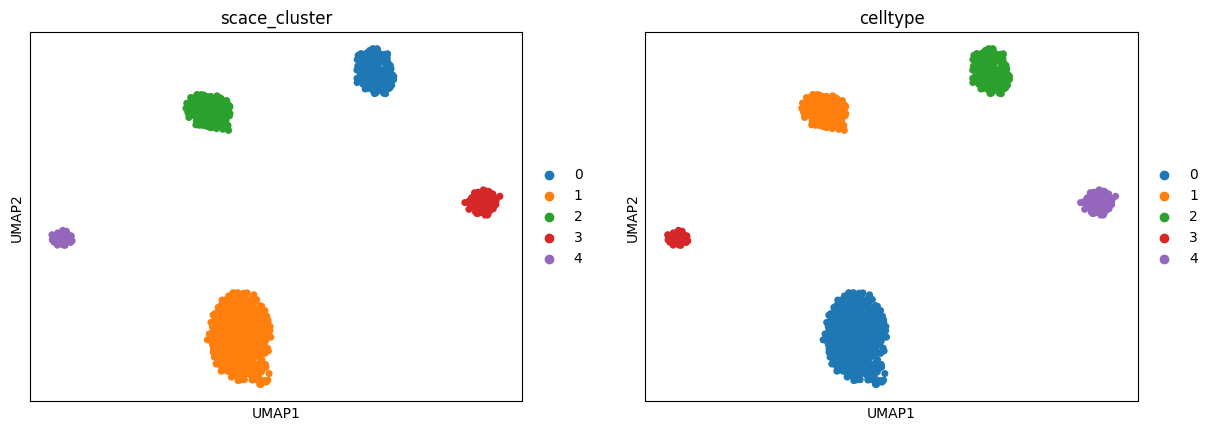

In [11]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [12]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

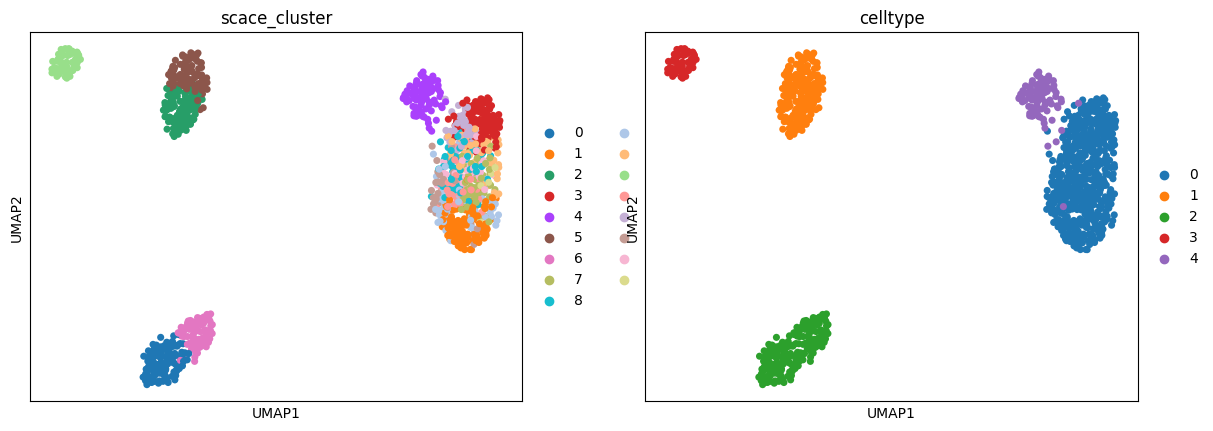

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [14]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

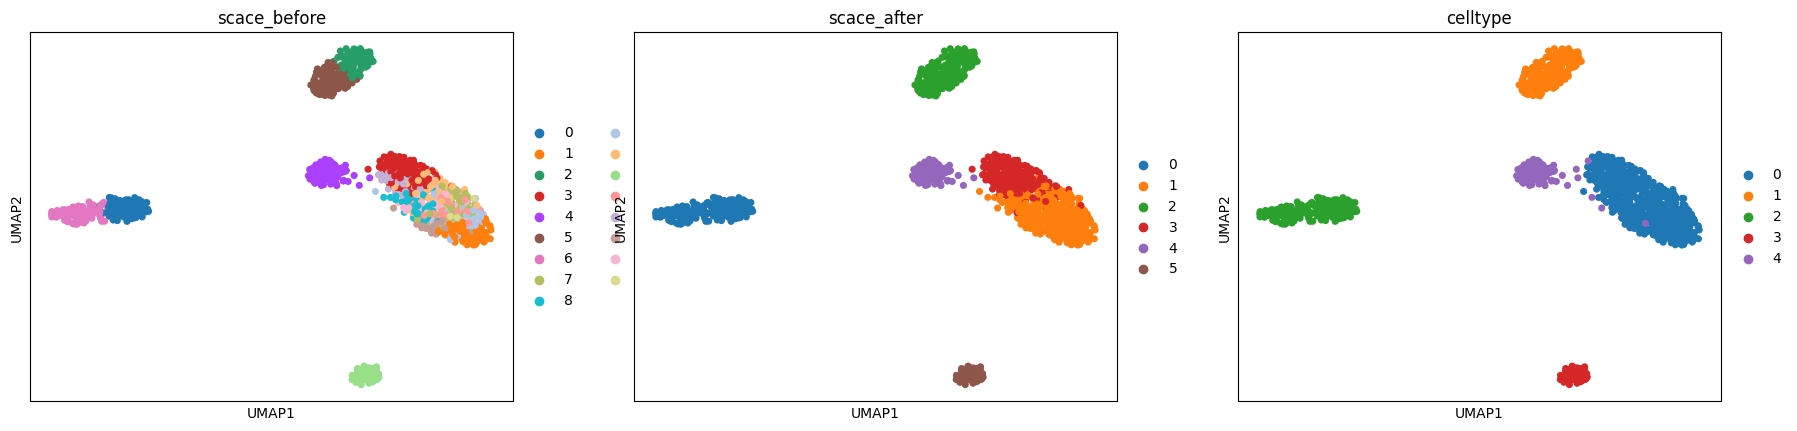

In [15]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [16]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

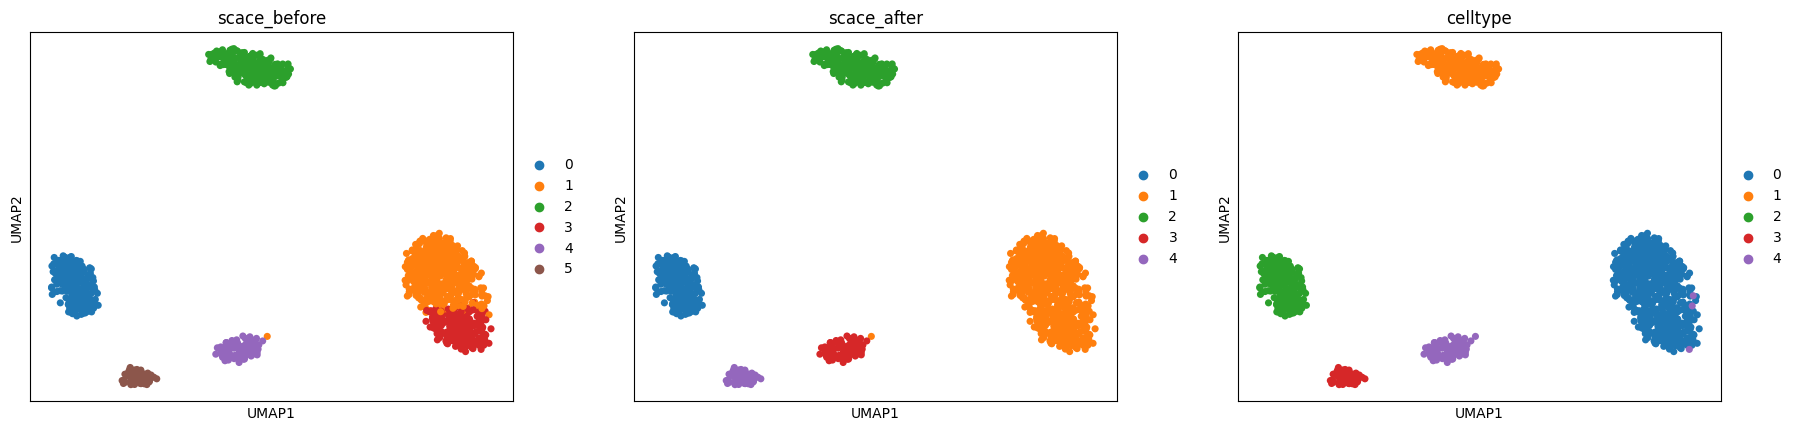

In [17]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])